In [2]:
x <- "Hello World"
x

[1] "Hello World"

In [3]:
library(R2jags)
library(MCMCvis)
library(coda)
library(lattice)


Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




In [33]:
jags.mod.cubicdist <- function(){
    Y ~ dnorm(1,1/4)
    Z <- Y**3
}
jags.mod.fit.cubicdist <- jags(data=list(),DIC=FALSE,parameters.to.save = c('Z'),n.iter=10000,n.chains=1,model.file = jags.mod.cubicdist)
print(jags.mod.fit.cubicdist)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 1
   Total graph size: 6

Initializing model

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c6c696cad.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
  mu.vect sd.vect    2.5%   25%   50%    75%   97.5%
Z  11.966  37.211 -35.429 -0.07 1.313 13.499 116.382


In [4]:
jags.mod.coin <- function(){
Y ~ dbin(0.5,10) # our data model
P8 <- ifelse(Y>7,1,0) # the probability of interest
}

In [5]:
jags.mod.fit.coin <- jags(data = list(), model.file = jags.mod.coin,
parameters.to.save = c('Y','P8'),n.chains=1,
DIC=FALSE, n.burnin=0,n.iter = 100)

module glm loaded

module dic loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model



In [6]:
print(jags.mod.fit.coin)


Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c5e94184.txt", fit using jags,
 1 chains, each with 100 iterations (first 0 discarded)
 n.sims = 100 iterations saved
   mu.vect sd.vect 2.5% 25% 50% 75% 97.5%
P8    0.04   0.197    0   0   0   0     1
Y     4.80   1.524    2   4   5   6     8


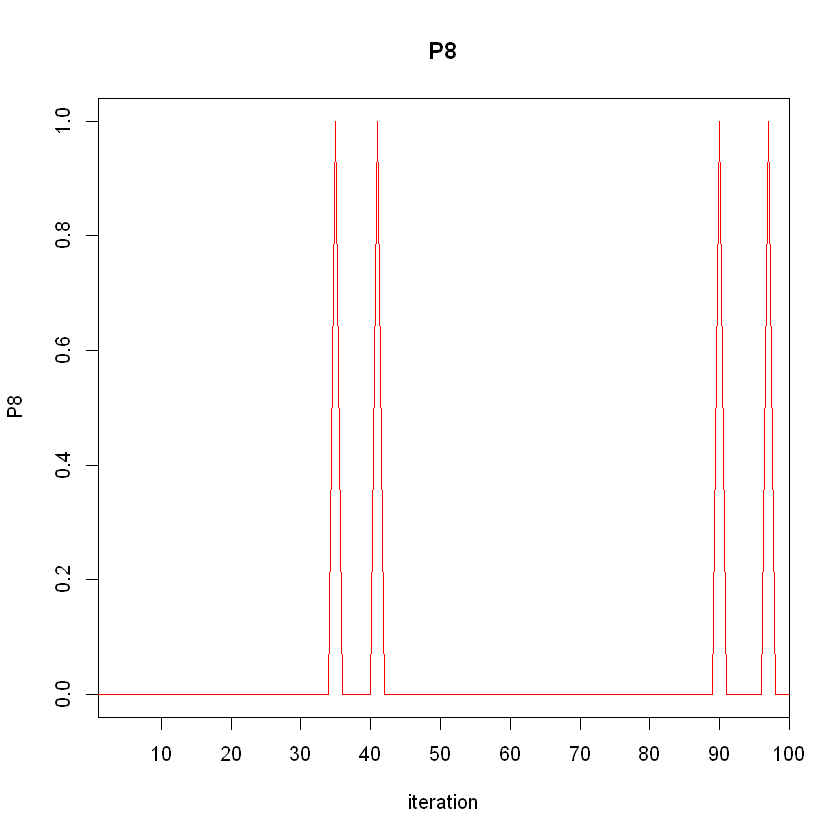

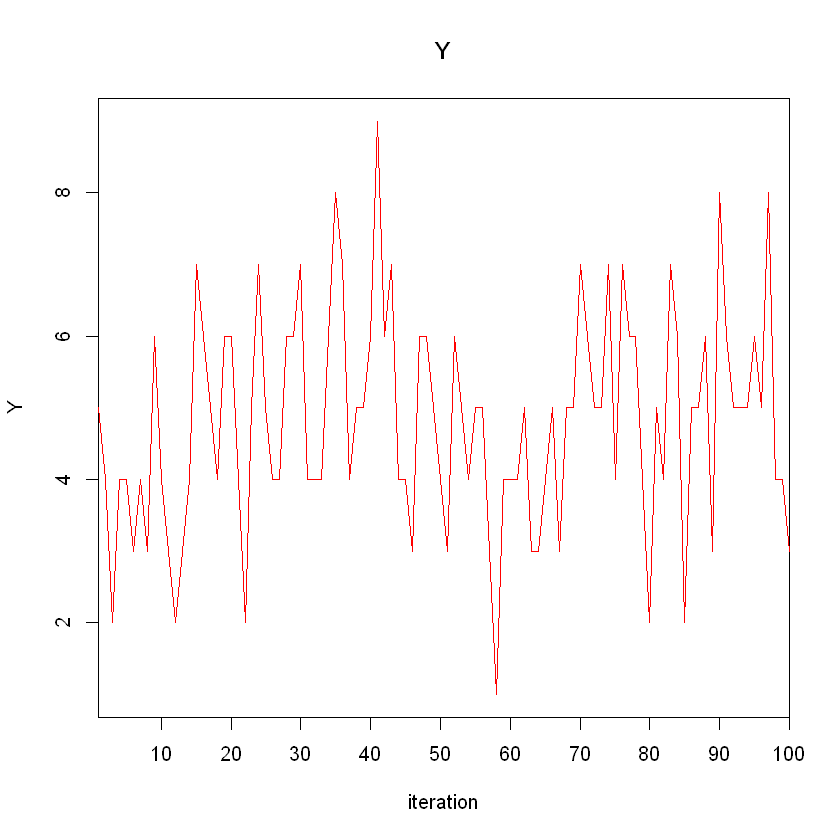

In [7]:
traceplot(jags.mod.fit.coin)

In [8]:
# convert into MCMC object
jagsfit.mcmc.coin <- as.mcmc(jags.mod.fit.coin)
# get numerical summary
summary(jagsfit.mcmc.coin)


Iterations = 1:100
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 100 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean     SD Naive SE Time-series SE
P8 0.04 0.1969  0.01969        0.01969
Y  4.80 1.5242  0.15242        0.19857

2. Quantiles for each variable:

   2.5% 25% 50% 75% 97.5%
P8    0   0   0   0     1
Y     2   4   5   6     8


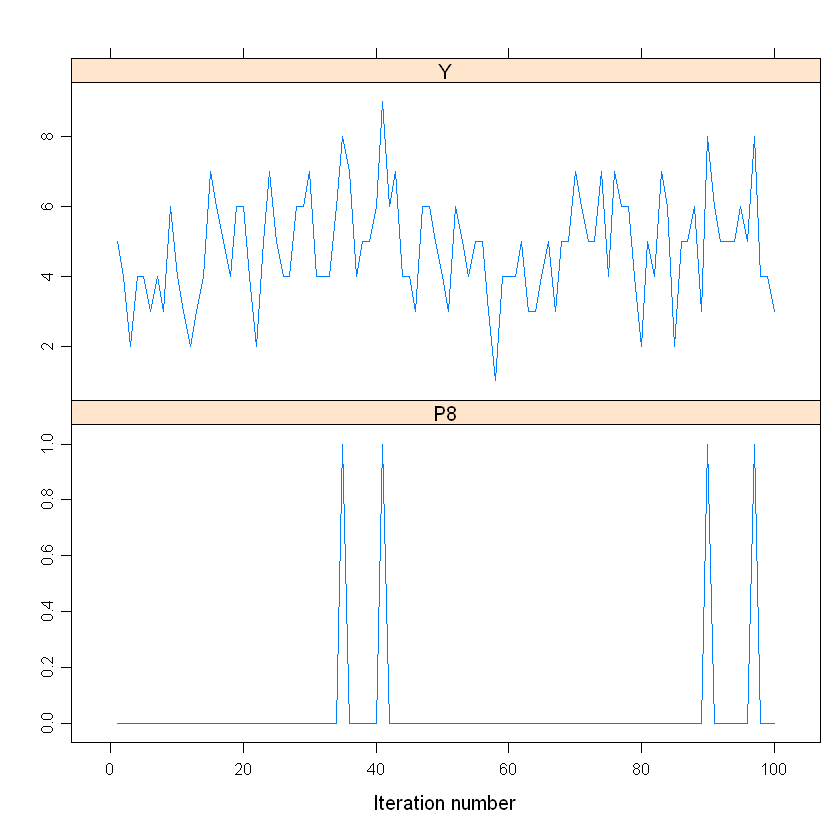

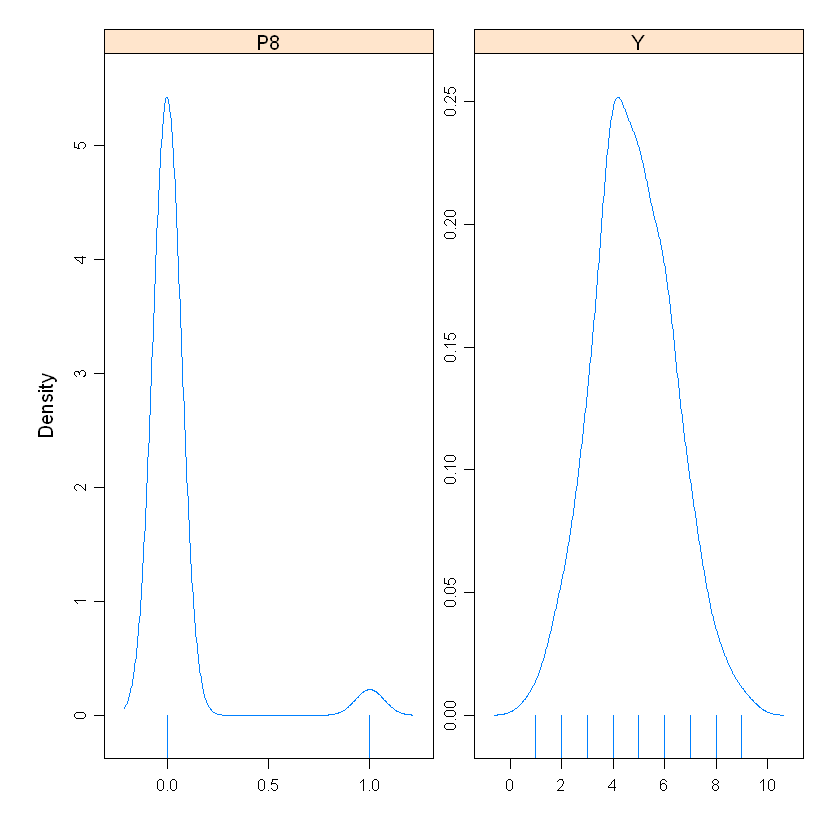

In [9]:
# get traceplots
xyplot(jagsfit.mcmc.coin)
# get density estimate
densityplot(jagsfit.mcmc.coin)

In [10]:
# Drug Trial Code
jags.mod.drug <- function(){
    prior ~ dbeta(9.2,13.8)
    y ~ dbin(prior,20)
    P.crit <- ifelse(y>=15,1,0)
} 
jags.mod.fit.drug <- jags(data = list(),n.iter = 10000,DIC=FALSE,parameters.to.save = c('prior','y','P.crit'),
model.file = jags.mod.drug,n.chains=1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 10

Initializing model



In [11]:
# Drug Trial Code
jags.mod.drug_ques <- function(){
    prior ~ dunif(0,1)
    y ~ dbin(prior,20)
    P.crit <- ifelse(y>=15,1,0)
} 
jags.mod.fit.drug_ques <- jags(data = list(),n.iter = 10000,DIC=FALSE,parameters.to.save = c('prior','y','P.crit'),
model.file = jags.mod.drug_ques,n.chains=1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 8

Initializing model



In [12]:
print(jags.mod.fit.drug_ques) # numerical summaries

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c40233df4.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
       mu.vect sd.vect  2.5%   25%   50%    75%  97.5%
P.crit   0.308   0.462 0.000 0.000  0.00  1.000  1.000
prior    0.521   0.294 0.036 0.259  0.53  0.788  0.978
y       10.316   6.149 0.000 5.000 10.00 15.000 20.000


Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c3636446.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
       mu.vect sd.vect 2.5%   25% 50%   75%  97.5%
P.crit   0.019   0.137 0.00 0.000 0.0  0.00  0.000
prior    0.403   0.100 0.22 0.331 0.4  0.47  0.603
y        8.136   2.960 3.00 6.000 8.0 10.00 14.000


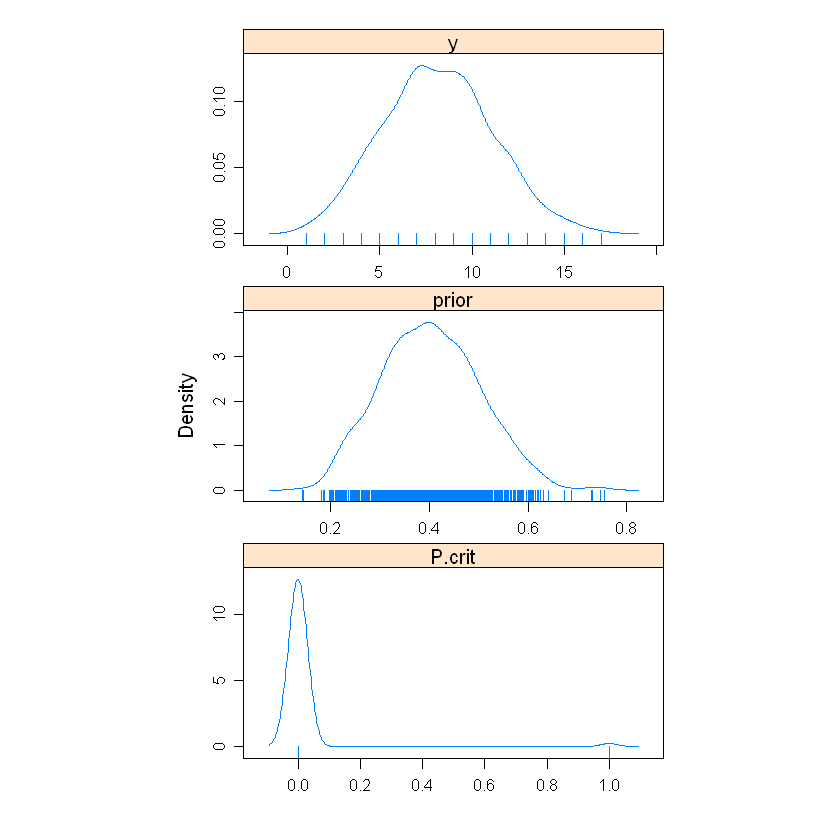

In [13]:
# Look at the outcome
print(jags.mod.fit.drug) # numerical summaries
# traceplots
# traceplot(jags.mod.fit)
# convert into MCMC object for more visualisation tools
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

In [14]:
# drug trial example 2
jags.mod.drug2 <- function(){
    prior ~ dbeta(a,b)
    likelihood ~ dbin(prior,n)
    likelihood.pred ~ dbin(prior,m)
    P.crit <- ifelse(likelihood.pred>=ncrit,1,0)
}

a=9.2 # first parameter of the prior
b=13.8 # second parameter of the prior
r=15 # resoinse (our data)
n=20 # patient number
m=40 # future patient number
ncrit=25 # threshold for future trial
jags.data.drug2 <- list('a','b','r','n','m','ncrit')


jags.mod.fit.drug2 <- jags(data = jags.data.drug2,n.iter=10000,parameters.to.save = c('likelihood','likelihood.pred','prior','P.crit'),
DIC=FALSE,model.file = jags.mod.drug2,n.chains = 1)

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 3
   Total graph size: 12

Initializing model



Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c76425a26.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
                mu.vect sd.vect  2.5%    25%   50%    75% 97.5%
P.crit            0.055   0.228 0.000  0.000  0.00  0.000   1.0
likelihood        7.951   2.976 3.000  6.000  8.00 10.000  14.0
likelihood.pred  15.641   5.071 7.000 12.000 15.00 19.000  26.0
prior             0.394   0.103 0.212  0.321  0.39  0.467   0.6


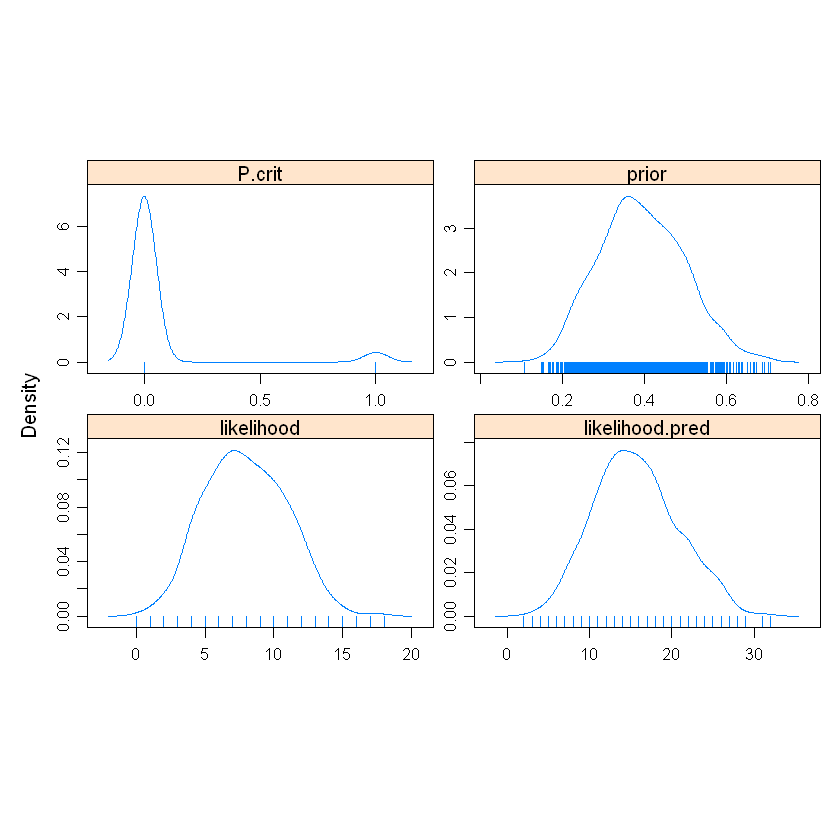

In [15]:
# Look at the outcome
print(jags.mod.fit.drug2) # numerical summaries
# traceplots
# traceplot(jags.mod.fit)
# convert into MCMC object for more visualisation tools
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug2)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 3
   Total graph size: 12

Initializing model

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c5379399e.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
                mu.vect sd.vect  2.5%   25%    50%    75%  97.5%
P.crit            0.383   0.486 0.000 0.000  0.000  1.000  1.000
likelihood        9.879   6.081 0.000 5.000 10.000 15.000 20.000
likelihood.pred  19.754  12.111 0.000 9.000 20.000 31.000 40.000
prior             0.491   0.294 0.019 0.235  0.486  0.756  0.976


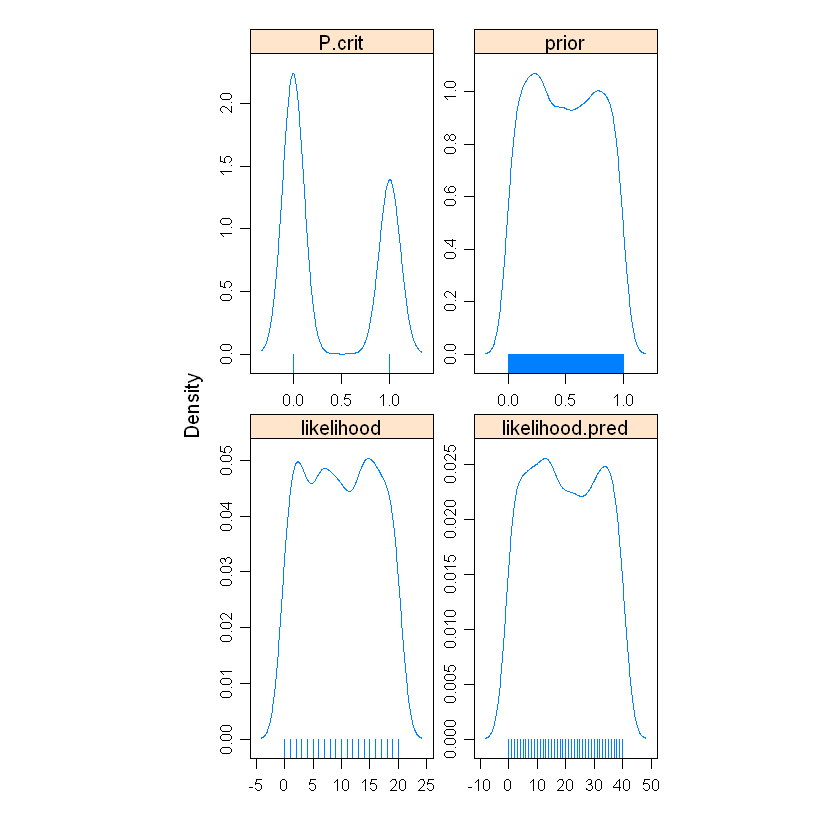

In [16]:
# drug trial example 2
jags.mod.drug3 <- function(){
    prior ~ dbeta(a,b)
    likelihood ~ dbin(prior,n)
    likelihood.pred ~ dbin(prior,m)
    P.crit <- ifelse(likelihood.pred>=ncrit,1,0)
}

a=1 # first parameter of the prior
b=1 # second parameter of the prior
r=15 # resoinse (our data)
n=20 # patient number
m=40 # future patient number
ncrit=25 # threshold for future trial
jags.data.drug3 <- list('a','b','r','n','m','ncrit')


jags.mod.fit.drug3 <- jags(data = jags.data.drug2,n.iter=10000,parameters.to.save = c('likelihood','likelihood.pred','prior','P.crit'),
DIC=FALSE,model.file = jags.mod.drug3,n.chains = 1)


print(jags.mod.fit.drug3) # numerical summaries
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug3)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

In [17]:
jags.mod.drug2 <- function(){
    prior ~ dbeta(a,b)
    likelihood ~ dbin(prior,n)
    likelihood.pred ~ dbin(prior,m)
    P.crit <- ifelse(likelihood.pred>=ncrit,1,0)
}
# Parameters we want to monitor
jags.param.drug2 <- c('prior','likelihood.pred','P.crit')
# Specify initial values
jags.inits1 <- list('prior' = 0.7, 'likelihood.pred' = 20)
jags.inits2 <- list('prior' = 0.5, 'likelihood.pred' = 28)
jags.inits.drug2 <- list(jags.inits1,jags.inits2)

a=9.2 # first parameter of the prior
b=13.8 # second parameter of the prior
r=15 # resoinse (our data)
n=20 # patient number
m=40 # future patient number
ncrit=25 # threshold for future trial
jags.data.drug2 <- list('a','b','r','n','m','ncrit')


jags.mod.fit.drug2 <- jags(data = jags.data.drug2, inits = jags.inits.drug2,
parameters.to.save = jags.param.drug2, n.chains = 2,DIC=FALSE,
n.iter = 10000, model.file = jags.mod.drug2)


Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 3
   Total graph size: 12

Initializing model



In [18]:
print(jags.mod.fit.drug2)

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c4aab4b35.txt", fit using jags,
 2 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 2000 iterations saved
                mu.vect sd.vect  2.5%    25%    50%    75%  97.5%  Rhat n.eff
P.crit            0.038   0.191 0.000  0.000  0.000  0.000  1.000 1.001  2000
likelihood.pred  15.835   4.833 7.000 12.000 16.000 19.000 25.000 1.001  2000
prior             0.398   0.097 0.214  0.328  0.395  0.462  0.597 1.001  2000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).


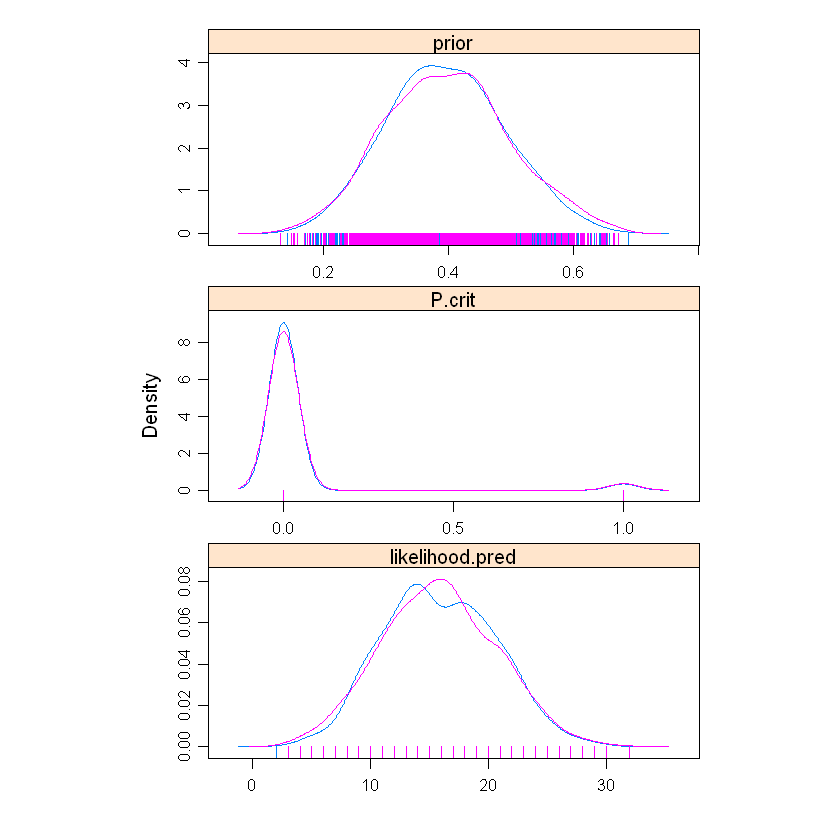

In [19]:
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug2)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

In [20]:
# problem on THM
jags.mod.thm <- function(){
    prior ~ dnorm(120,1/100)
    for(i in 1:N){
        likelihood[i] ~ dnorm(prior,1/25)
    }
    likelihood.pred ~ dnorm(prior,1/25)
    P.crit_1 = ifelse(prior>130,1,0)
    P.crit = ifelse(likelihood.pred>145,1,0)
}
N = 2
likelihood  = c(130,130)
jags.mod.data = list('N','likelihood')
jags.mod.fit.thm <- jags(data=jags.mod.data,parameters.to.save = c('prior','likelihood.pred','P.crit','P.crit_1'),
n.iter = 10000,model.file=jags.mod.thm)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 2
   Total graph size: 18

Initializing model



Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c181be37.txt", fit using jags,
 3 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 3000 iterations saved
                mu.vect sd.vect    2.5%     25%     50%     75%   97.5%  Rhat
P.crit            0.004   0.060   0.000   0.000   0.000   0.000   0.000 1.016
P.crit_1          0.372   0.483   0.000   0.000   0.000   1.000   1.000 1.001
likelihood.pred 128.887   6.003 116.722 124.900 128.936 133.006 140.542 1.001
prior           128.920   3.323 122.279 126.658 128.964 131.190 135.504 1.001
deviance         11.090   1.374  10.114  10.211  10.558  11.414  15.090 1.003
                n.eff
P.crit           3000
P.crit_1         3000
likelihood.pred  3000
prior            3000
deviance         2800

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(dev

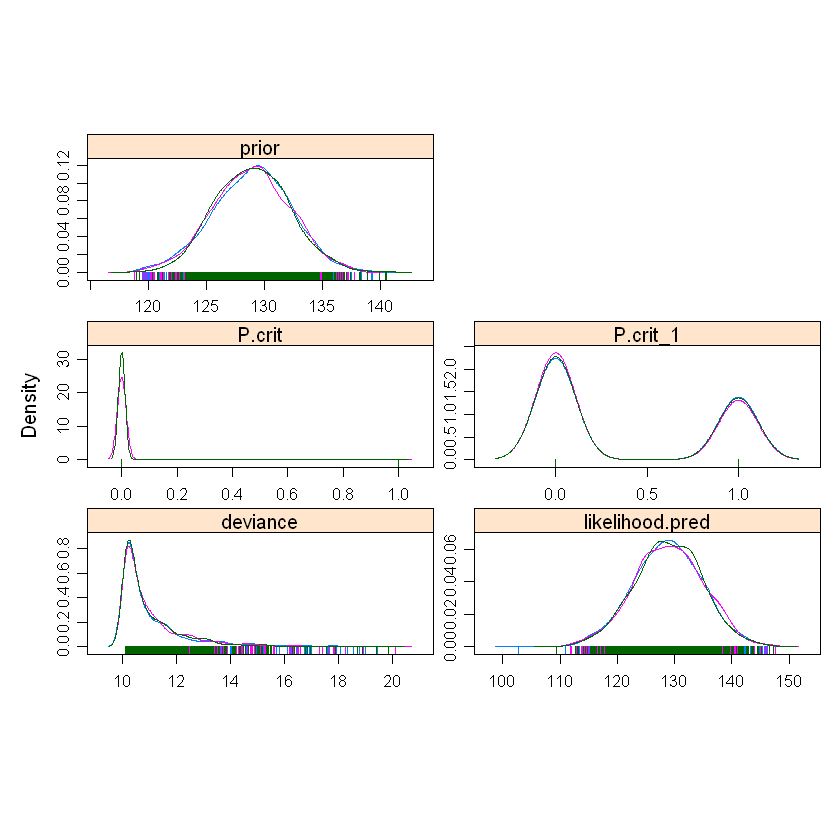

In [21]:
print(jags.mod.fit.thm)
jagsfit.mcmc.thm <- as.mcmc(jags.mod.fit.thm)
densityplot(jagsfit.mcmc.thm)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 4

Initializing model

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/Rtmp6LBio3/modelb1c1c4e4b83.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
            mu.vect  sd.vect   2.5%      25%      50%      75%    97.5%
likelihood 50911.84 74246.56 38.900 4861.750 21652.50 67260.25 274006.5
prior      50915.73 74245.58 39.917 4907.586 21680.51 67157.42 273876.8


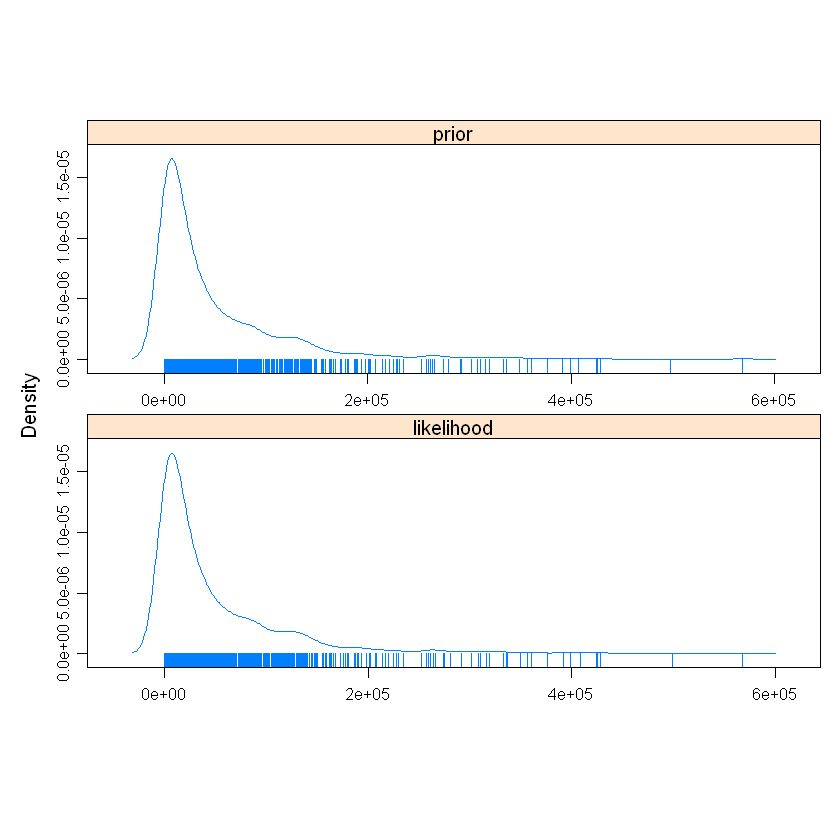

In [22]:
# question on flying bomb
jags.mod.flyingbomb <- function(){
    prior ~ dgamma(0.5,0.00001)
    likelihood ~ dpois(prior)
}
jags.mod.fit.flyingbomb <- jags(data=list(),n.iter=10000,parameters.to.save = c('prior','likelihood'),
model.file=jags.mod.flyingbomb,n.chains = 1,DIC=FALSE)

print(jags.mod.fit.flyingbomb)
jagsfit.mcmc.flyingbomb <- as.mcmc(jags.mod.fit.flyingbomb)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.flyingbomb)